In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pathlib import Path
from scipy.stats import linregress
from matplotlib.colors import ListedColormap

In [96]:
# File to Load 
sleep_health_data_to_load = Path("Resources/Sleep Health Lifestyle.csv")

# Read Sleep Data File and store into Pandas DataFrames
sleep_health_data = pd.read_csv(sleep_health_data_to_load)
sleep_health_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep (1-10),Physical Activity Level (1-100),Stress Level (1-10),BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


<Figure size 1200x800 with 0 Axes>

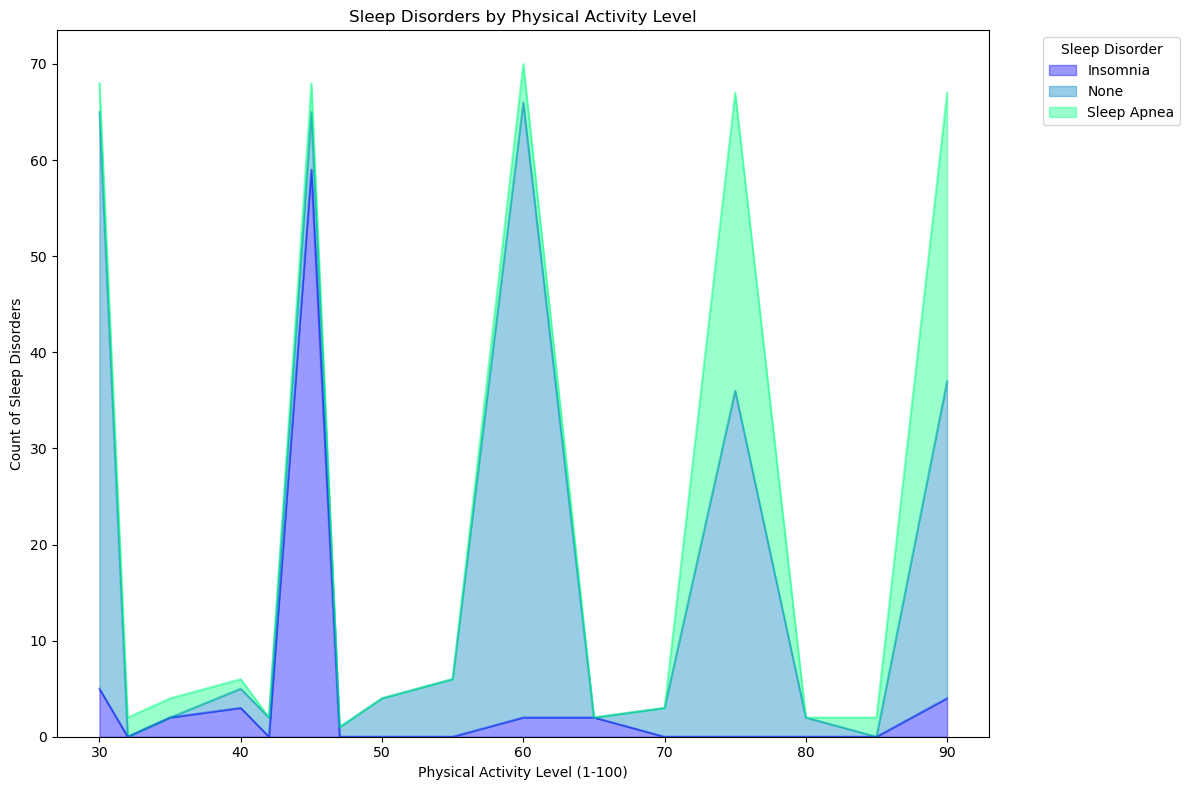

In [154]:
#Sleep Disorders by Physical Activity - Area Chart (COMPLETE)

# Group by 'Physical Activity Level' and 'Sleep Disorder'
sleep_health_data['Sleep Disorder'] = sleep_health_data['Sleep Disorder'].fillna('None')
sleep_bar = sleep_health_data.groupby(['Physical Activity Level (1-100)', 'Sleep Disorder']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sleep_bar.plot(kind='area', alpha=0.4, colormap='winter', figsize=(12, 8))
plt.xlabel('Physical Activity Level (1-100)')
plt.ylabel('Count of Sleep Disorders')
plt.title('Sleep Disorders by Physical Activity Level')
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 

<Figure size 1200x800 with 0 Axes>

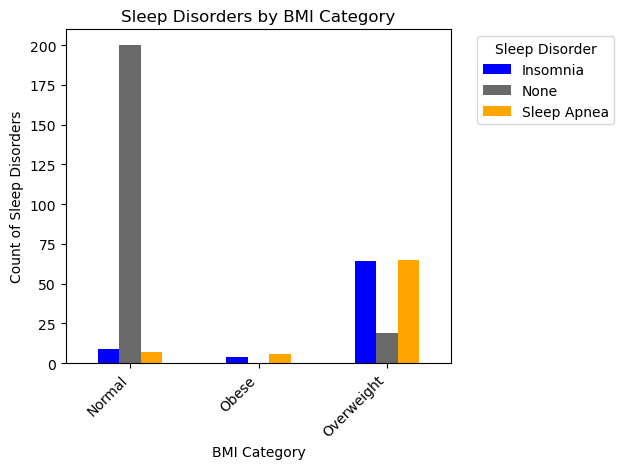

In [161]:
#Sleep Disorders by BMI - Clustered Bar Graph (COMPLETE)

# Fill NaN values in 'Sleep Disorder' with 'None'
sleep_health_data['Sleep Disorder'] = sleep_health_data['Sleep Disorder'].fillna('None')

# Group by 'BMI Category' and 'Sleep Disorder', then count 
bmi_sleep_disorder_counts = sleep_health_data.groupby(['BMI Category', 'Sleep Disorder']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
bmi_sleep_disorder_counts.plot(kind='bar', color=['blue', 'dimgray', 'orange']) 
plt.xlabel('BMI Category')
plt.ylabel('Count of Sleep Disorders')
plt.title('Sleep Disorders by BMI Category')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

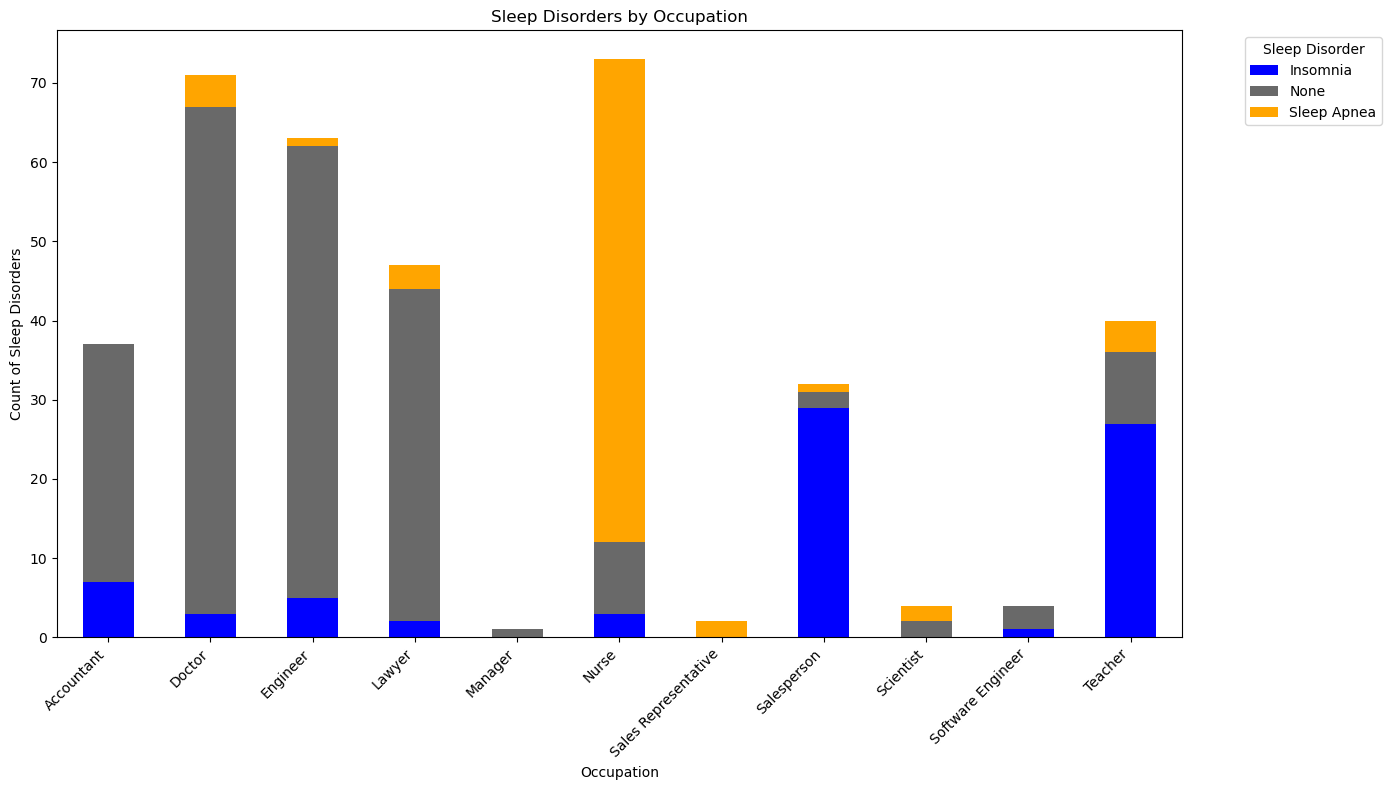

In [162]:
#Sleep Disorder By Occupation - Stacked Bar Graph (COMPLETE)

sleep_health_data['Sleep Disorder'] = sleep_health_data['Sleep Disorder'].fillna('None')


sleep_disorder_counts = sleep_health_data.groupby(['Occupation', 'Sleep Disorder']).size().unstack()


sleep_disorder_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=['blue', 'dimgray', 'orange'])

plt.xlabel('Occupation')
plt.ylabel('Count of Sleep Disorders')
plt.title('Sleep Disorders by Occupation')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

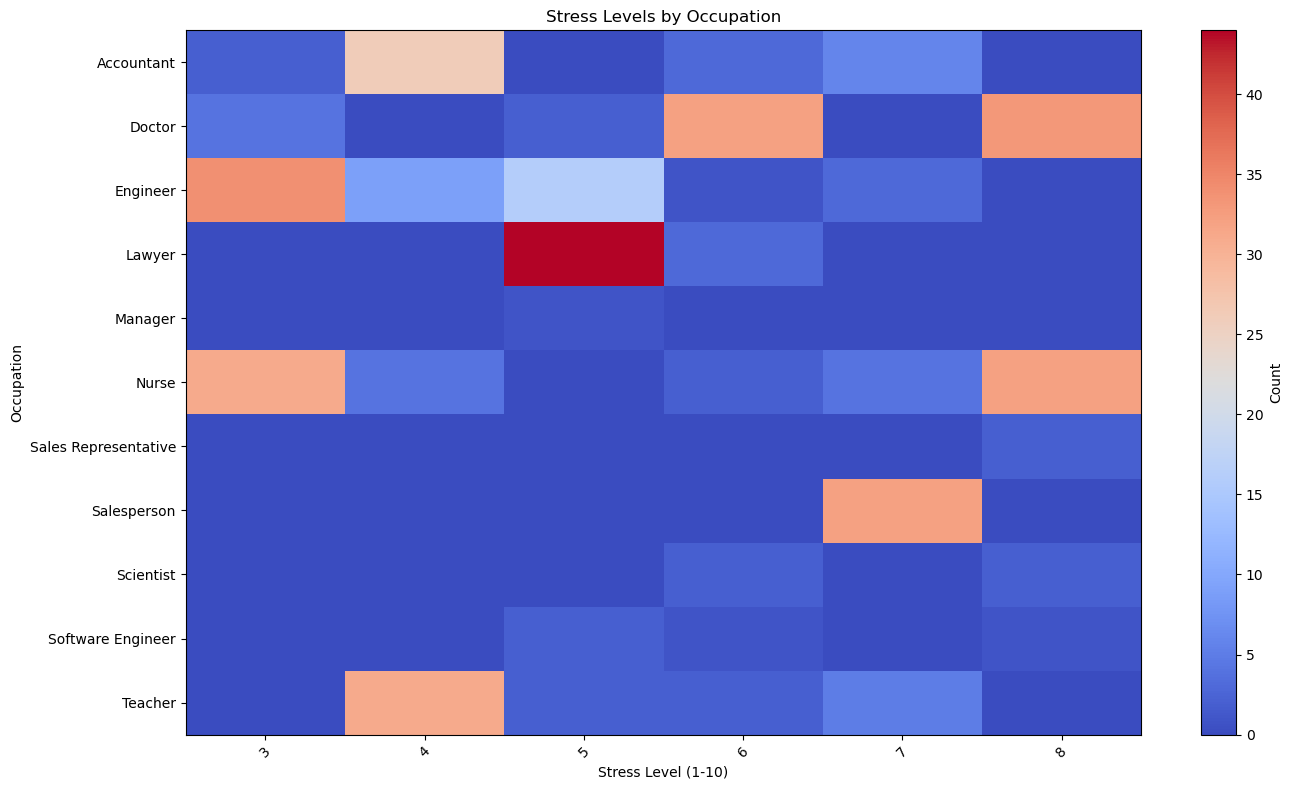

In [156]:
#Stress Levels by Occupation - Heatmap (COMPLETE)

occupation_stress_data = sleep_health_data.pivot_table(index='Occupation', columns='Stress Level (1-10)', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 8))
plt.imshow(occupation_stress_data, cmap='coolwarm', aspect='auto')

plt.colorbar(label='Count')
plt.xticks(range(len(occupation_stress_data.columns)), occupation_stress_data.columns, rotation=45)
plt.yticks(range(len(occupation_stress_data.index)), occupation_stress_data.index)
plt.xlabel('Stress Level (1-10)')
plt.ylabel('Occupation')
plt.title('Stress Levels by Occupation')
plt.tight_layout()
plt.show()

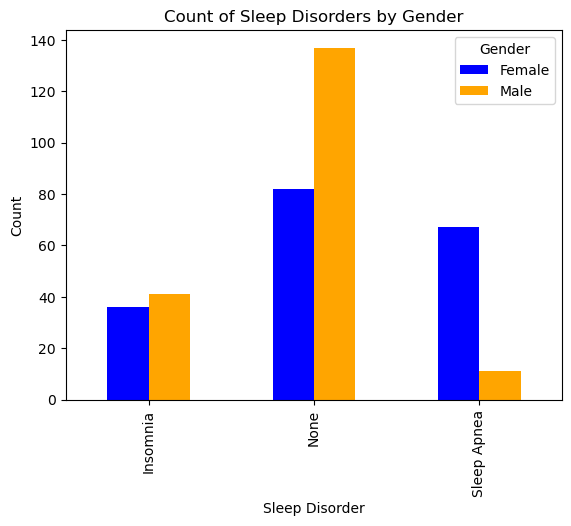

In [163]:

#Sleep Disorders by Gender - Clustered Bar Graph (COMPLETE)

sleep_health_data['Sleep Disorder'] = sleep_health_data['Sleep Disorder'].fillna('None')
sleep_bar = sleep_health_data.groupby(['Sleep Disorder', 'Gender']).size().unstack()

sleep_bar.plot(kind='bar', color=['blue', 'orange'])  # Colors for each gender
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.title('Count of Sleep Disorders by Gender')
plt.show()

In [102]:
#Gender vs Occupation (INCOMPLETE)(MAY)


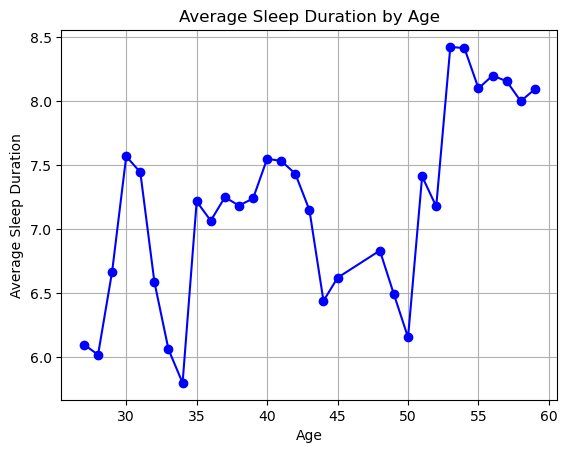

In [165]:
#Average Sleep Duration by Age - Line Graph


sleep_bar = sleep_health_data.groupby('Age')['Sleep Duration'].mean()

sleep_bar.plot(kind='line', marker='o', color='blue')
plt.xlabel('Age')
plt.ylabel('Average Sleep Duration')
plt.title('Average Sleep Duration by Age')
plt.grid(True)
plt.show()

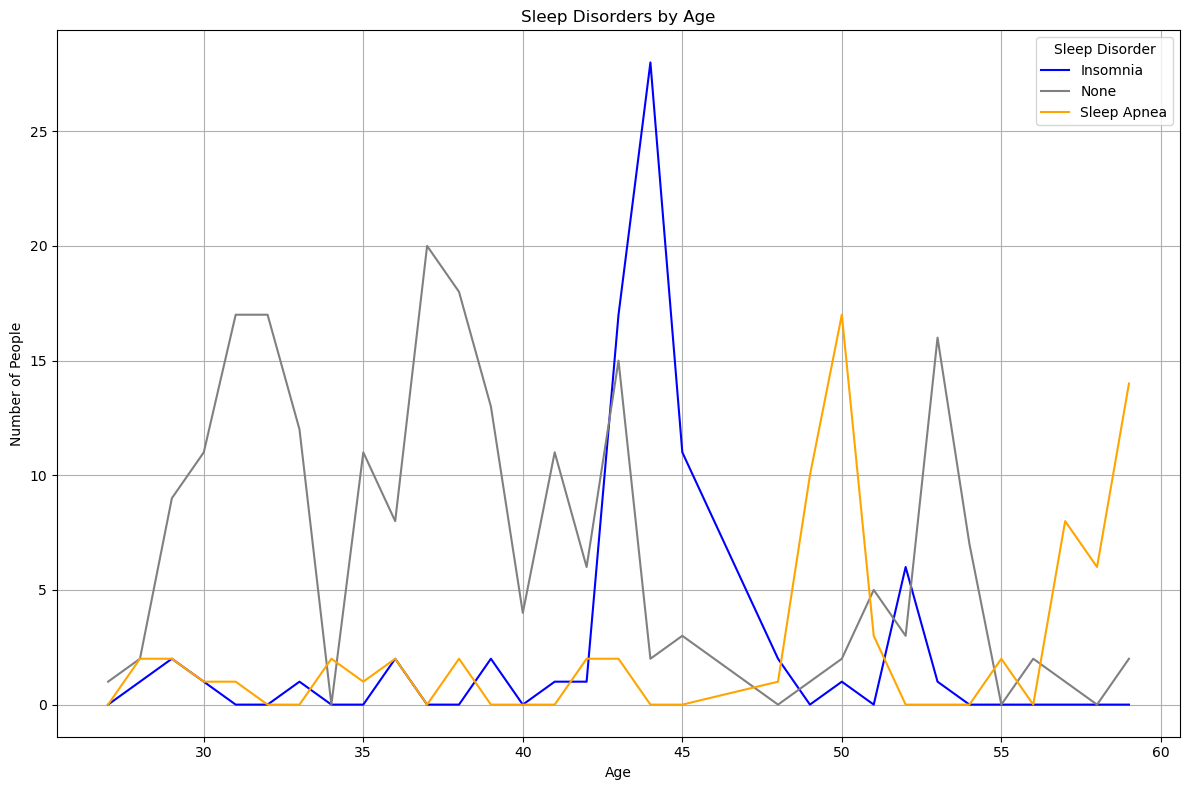

In [164]:
#Sleep Disorders by Age - Lineplot (COMPLETE)

# Group by 'Age' and 'Sleep Disorder', then count 
age_sleep_disorder = sleep_health_data.groupby(['Age', 'Sleep Disorder']).size().unstack().fillna(0)

# Define custom colors for each sleep disorder
colors = ['blue', 'grey', 'orange']

# Plotting
plt.figure(figsize=(12, 8))

# Plot each sleep disorder as a line with custom colors
for i, disorder in enumerate(age_sleep_disorder.columns):
    plt.plot(age_sleep_disorder.index, age_sleep_disorder[disorder], color=colors[i], label=disorder)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Sleep Disorders by Age')
plt.legend(title='Sleep Disorder')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()